In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.linalg as la
import random
import math
from scipy.stats import norm
import scipy
from scipy.stats import multivariate_normal

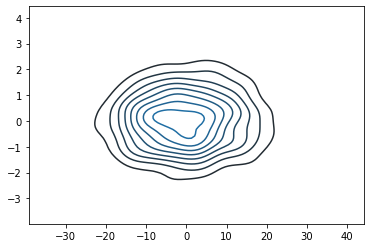

In [2]:
# target distribution

sigma = np.array([[100,0],[0,1]]) # 协方差
mu = np.zeros(2) # 生成 array([0., 0.])
ys = np.random.multivariate_normal(mu, sigma, 800) # 生成满足此二维分布的样本对，这个里面有1000对

K = 100
a=[K,1]   
Cov = np.diag(a)
#ys = np.random.multivariate_normal((0,0),Cov,1000)
yz = []
for i in range (800):
    yzs = (multivariate_normal((0,0), Cov)).pdf([ys[i][0],ys[i][1]])
    yz.append(yzs)

sns.kdeplot(ys[:,0], ys[:,1]) #,shade = True, cbar = True )
#plt.axis([-3.5,3.5,-3.5,3.5])
pass

In [3]:
# define a standard shape
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    ys = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1])
    return ys

In [4]:
# the initial position
x=0 
y=0

m = 400 # burn in period
n = 800 # sample numbers, and n/L must be an int
K_s = 10 # the original cov
L = 100 # memory steps, per 100 steps, calculate the accept again
a = 0.23 # resable accept_prob
epil = 0.01
K = []
K.append(K_s)
step = 10 # step for generate a new cov

bx_sample =[]
by_sample =[]
P_sample =[] # for the number of accpet probi
bz_sample =[]

In [5]:
# test the standard shape
for t in range(0,int(n/L)):
    count = 0 #count how many samples have been accept
    
    if t == 0:
        i = 0
    if t > 0:
        i =m
    
    while i < L+m:
        x_1,y_1 = np.random.multivariate_normal(mean=[x,y], cov=[[K[t],0],[0,1]])
        #if 0< x_1 < xmax and 0 < y_1 < ymax:
        x_sample = x_1 
        y_sample = y_1

        accept_prob = min(1, z(x_sample,y_sample)/z(x,y) * 1.0)
        #print('accept_prob:',accept_prob)
        u = random.uniform(0, 1)
        #print('u:',u)
        #ax_sample.append(x_sample)
        #ay_sample.append(y_sample)

 

        if t > 0 : # no burn in period
        
            if u < accept_prob: # 
                x = x_sample
                y = y_sample
                count = count +1
                
            bx_sample.append(x)
            by_sample.append(y)
            bz_sample.append(z(x,y))
            
        if t == 0: # only the first time has burn in period
            
            if u < accept_prob: # 
                x = x_sample
                y = y_sample
                #print('x:,y:',x,y)
                if i >= m:
                    count = count +1 # after burn in period, the number of accpetance
            
            if i >= m:
                bx_sample.append(x)
                by_sample.append(y)
                bz_sample.append(z(x,y))
            
        i = i + 1
            
        
            
    P_accept = count*1.0/L
    P_sample.append(P_accept)
    tau = len(P_sample)
    K.append(K[t])
    if a-epil < P_accept < a+epil :
        K[t+1] = K[t]
    else :
        if tau >= 2 and np.abs(a-P_sample[tau-1]) > np.abs(a-P_sample[tau-2]) :
            K[tau-1] = K[tau-2]
        K[tau] = np.random.normal(K[tau-1],step)
            
            
        




In [19]:
k=[1]

In [20]:
k.append(2)

In [25]:
k[0+1]=k[-1]

In [26]:
k

[1, 2]

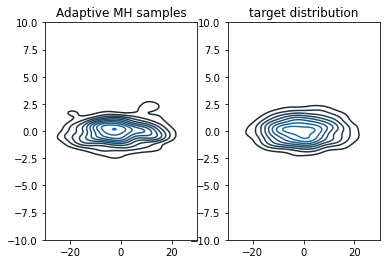

In [6]:
fig = plt.figure()
axx = fig.add_subplot(121)
#plt.plot(bx_sample,by_sample,"r.")
sns.kdeplot(bx_sample, by_sample ) #,shade = True, cbar = True )
axx.set_title('Adaptive MH samples')
plt.axis([-30,30,-10,10])


axx = fig.add_subplot(122)
sns.kdeplot(ys[:,0], ys[:,1]) #,shade = True, cbar = True )
#plt.plot(bx_sample,by_sample,"r.")
axx.set_title('target distribution')
plt.axis([-30,30,-10,10])
pass

In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

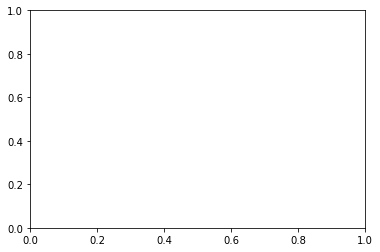

In [9]:
ax = plt.gca()

TypeError: object of type 'int' has no len()

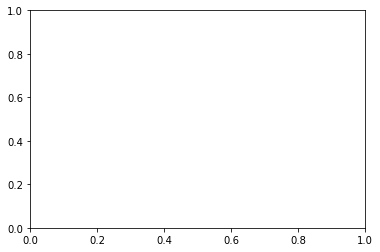

In [13]:
sns.kdeplot(10,10)

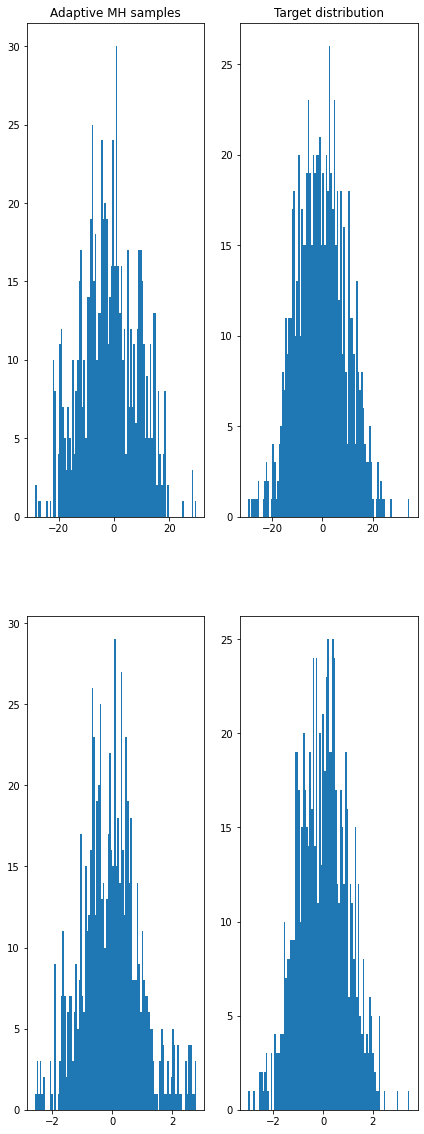

In [7]:
fig = plt.figure(figsize =(7,20))
axx = fig.add_subplot(221)
axx.hist(bx_sample, bins=100)
axx.set_title('Adaptive MH samples')

axx = fig.add_subplot(222)
axx.hist(ys[:,0], bins=100)
axx.set_title('Target distribution')

axx = fig.add_subplot(223)
axx.hist(by_sample, bins=100)

axx = fig.add_subplot(224)
axx.hist(ys[:,1], bins=100)

plt.show()

In [30]:
len(bx_sample)

800

In [13]:
int(n/L)

8

In [10]:
#np.random.normal(2,1)

2.3879105583406464

In [8]:
if 2+1 < 4 < 4  :
    print('yes')
else:
    print('no')

no


In [15]:
if 0 ==0:

    print('yes')

yes


In [24]:
i=2

while i< 5+2 :
    print(i)
    i = i +1

2
3
4
5
6


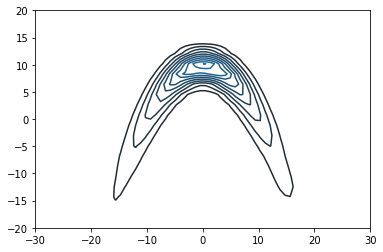

In [43]:
# target distribution: banana shape
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    #x = np.random.multivariate_normal((0,0),Cov)
    e = x_0
    f = x_1
    b = -0.1
    #x[1] = np.add(x[1],(0.03*(x[0]*x[0]-K))) # b = 0.03
    x_1 = np.add(x_1,(b*(x_0*x_0-K)))
    #x_0 = x_0 + e 
    #x_1 = x_1 + f
    yz = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1]) 
    return x_0,x_1,yz

ax0_sample =[]
ax1_sample =[]
az_sample =[]
K = 100
a=[K,1]   
Cov =  np.array([[100,0],[0,1]])
#Cov

for i in range(8000):
    y = np.random.multivariate_normal((0,0),Cov) 
    x0,x1,zy = z(y[0],y[1])
    ax0_sample.append(x0)
    ax1_sample.append(x1)
    #ax0_sample.append(y[0])
    #ax1_sample.append(y[1])
    az_sample.append(zy)

#for i in range(1000):
   # print(y[i][0])
    
sns.kdeplot(ax0_sample, ax1_sample ) #,shade = True, cbar = True )
plt.axis([-30,30,-20,20])
pass

In [50]:
# define a banana shape
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    #x = np.random.multivariate_normal((0,0),Cov)
    e = x_0
    f = x_1
    b = 0.03
    #x[1] = np.add(x[1],(0.03*(x[0]*x[0]-K))) # b = 0.03
    x_1 = np.add(x_1,(b*(x_0*x_0-K)))
    #x_0 = x_0 + e 
    #x_1 = x_1 + f
    yz = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1]) 
    return yz

In [54]:
x=0
y=0

m = 4000 # burn in period
n = 8000 # sample numbers, and n/L must be an int
K_s = 10 # the original cov
L = 1000 # memory steps, per 100 steps, calculate the accept again
a = 0.23 # resable accept_prob
epil = 0.01
K = []
K.append(K_s)
step = 10 # step for generate a new cov

bx_sample =[]
by_sample =[]
P_sample =[] # for the number of accpet probi
bz_sample =[]

In [55]:
# test the banana shape
for t in range(0,int(n/L)):
    count = 0 #count how many samples have been accept
    
    if t == 0:
        i = 0
    if t > 0:
        i =m
    
    while i < L+m:
        x_1,y_1 = np.random.multivariate_normal(mean=[x,y], cov=[[K[t],0],[0,1]])
        #if 0< x_1 < xmax and 0 < y_1 < ymax:
        x_sample = x_1 
        y_sample = y_1

        accept_prob = min(1, z(x_sample,y_sample)/z(x,y) * 1.0)
        #print('accept_prob:',accept_prob)
        u = random.uniform(0, 1)
        #print('u:',u)
        #ax_sample.append(x_sample)
        #ay_sample.append(y_sample)

 

        if t > 0 : # no burn in period
        
            if u < accept_prob: # 
                x = x_sample
                y = y_sample
                count = count +1
                
            bx_sample.append(x)
            by_sample.append(y)
            bz_sample.append(z(x,y))
            
        if t == 0: # only the first time has burn in period
            
            if u < accept_prob: # 
                x = x_sample
                y = y_sample
                #print('x:,y:',x,y)
                if i >= m:
                    count = count +1 # after burn in period, the number of accpetance
            
            if i >= m:
                bx_sample.append(x)
                by_sample.append(y)
                bz_sample.append(z(x,y))
            
        i = i + 1
            
        
            
    P_accept = count*1.0/L
    P_sample.append(P_accept)
    tau = len(P_sample)
    K.append(K[t])
    if a-epil < P_accept < a+epil :
        K[t+1] = K[t]
    else :
        if tau >= 2 and np.abs(a-P_sample[tau-1]) > np.abs(a-P_sample[tau-2]) :
            K[tau-1] = K[tau-2]
        K[tau] = np.random.normal(K[tau-1],step)
            
            
        




C:\Users\Customer\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


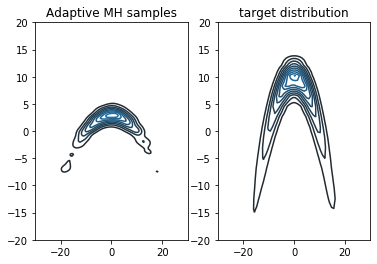

In [58]:
fig = plt.figure()
axx = fig.add_subplot(121)
#plt.plot(bx_sample,by_sample,"r.")
sns.kdeplot(bx_sample, by_sample ) #,shade = True, cbar = True )
axx.set_title('Adaptive MH samples')
plt.axis([-30,30,-20,20])


axx = fig.add_subplot(122)
sns.kdeplot(ax0_sample, ax1_sample ) #,shade = True, cbar = True )
#plt.plot(bx_sample,by_sample,"r.")
axx.set_title('target distribution')
plt.axis([-30,30,-20,20])
pass

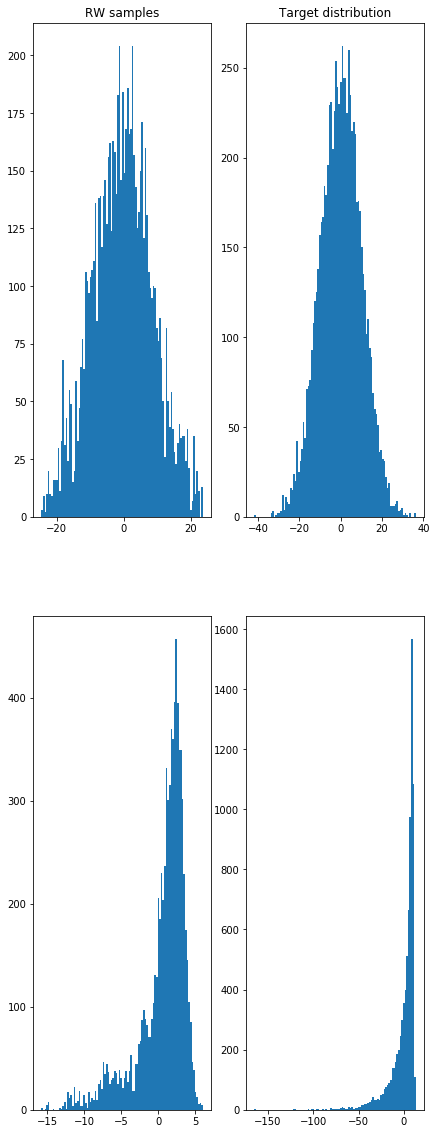

In [57]:
fig = plt.figure(figsize =(7,20))
axx = fig.add_subplot(221)
axx.hist(bx_sample, bins=100)
axx.set_title('RW samples')

axx = fig.add_subplot(222)
axx.hist(ax0_sample, bins=100)
axx.set_title('Target distribution')

axx = fig.add_subplot(223)
axx.hist(by_sample, bins=100)

axx = fig.add_subplot(224)
axx.hist(ax1_sample, bins=100)

plt.show()